# Técnicas de Reducción de Varianza

## Ejercicio:

* Calcular el valor exacto de esta integral.

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos la función de prueba.
def funcion(x):
    return 1.0/(1+x) 

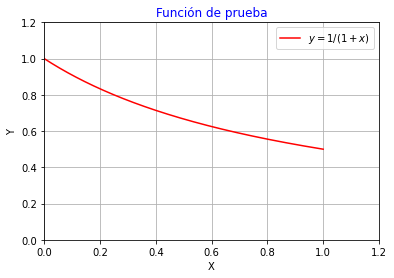

In [3]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
#plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m}$$

In [4]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69299
El error estándar es: 0.13878


In [5]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(1-u)
        suma.append(y)

    return np.mean(suma), np.std(suma), suma

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69552
El error estándar es: 0.13865


In [6]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)

    return np.mean(suma), np.std(suma)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.6926
El error estándar es: 0.02418


In [7]:
def mc_crudo(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma),5))
    
    return np.mean(suma), np.std(suma), integral

In [8]:
def mc_crudo1(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=funcion(u)
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma),5))
    
    return np.mean(suma), np.std(suma), integral

El valor de la integral es: 0.69709
El error estándar es: 0.142
El valor de la integral es: 0.6941
El error estándar es: 0.02516


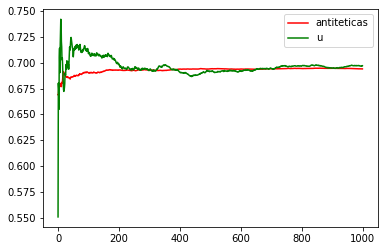

In [9]:
X1=mc_crudo1(funcion, n=1000)[2]
X=mc_crudo(funcion, n=1000)[2]

plt.plot(X, color='red', label='antiteticas')
plt.plot(X1, color='green', label='u')
plt.legend()